In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='pastel')

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
rename_map = {column: column.lower() for column in df.columns}
df.rename(rename_map, axis=1, inplace=True)
df['family'] = df['sibsp'] + df['parch']

# Категориальные признаки
## countplot
Показывает кол-во в каждой категории

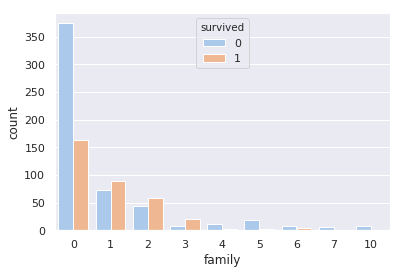

In [43]:
sns.countplot('family', hue='survived', data=df);

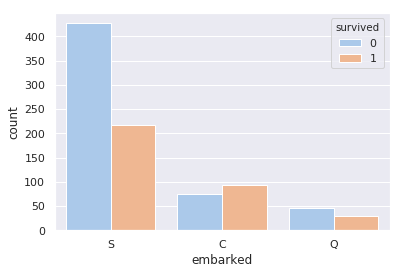

In [44]:
sns.countplot('embarked', hue='survived', data=df);

Больше всегоо людей село на титаник в Southampton и в основном это были люди с билетами третьего класса.

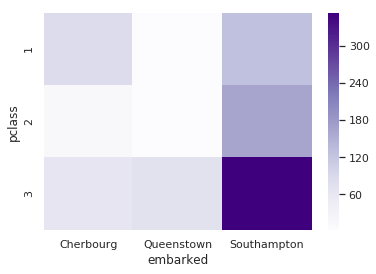

In [53]:
ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
sns.heatmap(data=pd.crosstab(df['pclass'], df['embarked'].replace(ports)), cmap='Purples');

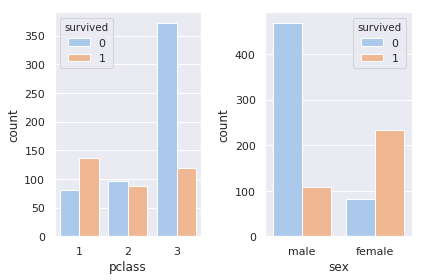

In [8]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.countplot('pclass', hue='survived', data=df, ax=ax1);
sns.countplot('sex', hue='survived', data=df, ax=ax2);
plt.tight_layout();

# boxplot
Показывает медиану и квартели в распределении количественных данных

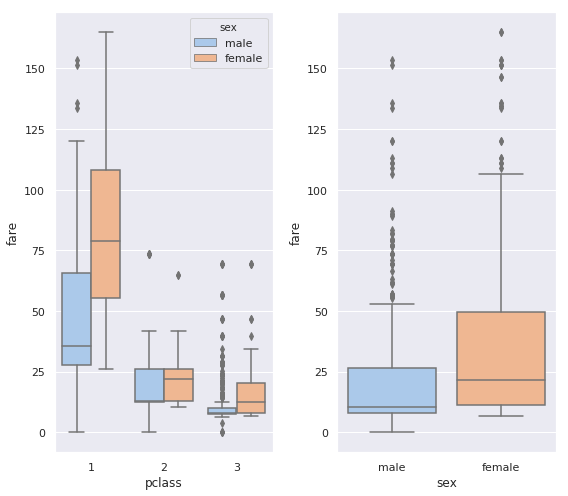

In [36]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,7))
sns.boxplot(x='pclass', y='fare', hue='sex', data=df[df['fare'] < 200], ax=ax1);
sns.boxplot(y='fare', x='sex', data=df[df['fare'] < 200], ax=ax2);
plt.tight_layout();

## barplot

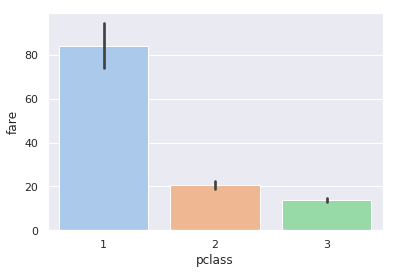

In [23]:
sns.barplot(x='pclass', y='fare', data=df);

# Коливественные признаки
## distplot

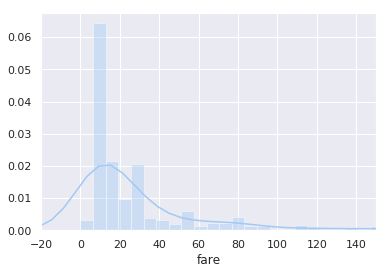

In [11]:
sns.distplot(df['fare'], bins=80);
plt.xlim(-20, 150);